In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.0f' % x)
pd.set_option('display.max_columns', None)


In [2]:
raw_data = pd.read_csv("house_listings.csv")
raw_data.head()

,name,price,location,link,Description,Property Address,Estate Name,Property Size,Condition,Furnishing,Attribute_1,Attribute_2,Attribute_3,Subtype,Agency Fee,Legal and Agreement Fee,Caution Fee,Total Fee,Service Charge Fee,Service Charge Covers,Pets,New Property,Total Rooms,Parking Space,Broker Fee,Facilities,Listing by,Furnished
0,"2bdrm Bungalow in Good Home Estate, Ado / Ajah...",900000,"Ajah, Ado / Ajah",https://jiji.ng/ado-ajah/houses-apartments-for...,Standard Self Serviced 2Bed Flat En-suite with...,Good Home Estate,Good Home Estate,500sqm,Fairly Used,Semi-Furnished,Bungalow,2 bedrooms,2 bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"3bdrm Townhouse / Terrace in Ikota Villa, Lekk...",3000000,"Lekki, Lekki Expressway",https://jiji.ng/lekki-expressway/houses-apartm...,"3 bed duplex terrace with BQ, all rooms ensut ...","3 bed terrace with BQ and extra room, all ensa...",IKOTA VILLA,300sqm,Renovated,Semi-Furnished,Townhouse / Terrace,3 bedrooms,3 bathrooms,Detached,300000,300000,150000,750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mini Flat in Gbagada for rent,1600000,Gbagada,https://jiji.ng/gbagada/houses-apartments-for-...,F E A T U R E S\n- Security \n- Inverter \n- C...,Pedro Gbagada Lagos,NaN,110sqm,Newly-Built,Semi-Furnished,Mini Flat,1 bedroom,1 bathroom,NaN,NaN,NaN,NaN,NaN,200000,"Waste removal, compound cleaning, security, etc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"4bdrm Townhouse / Terrace in Orchid Road, Chev...",3700000,"Lekki, Chevron",https://jiji.ng/chevron/houses-apartments-for-...,For rent \nnewly built serviced \n4-bedroom te...,Orchid road,Orchid road,300sqm,Newly-Built,Unfurnished,Townhouse / Terrace,4 bedrooms,4 bathrooms,Semi-Detached,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"2bdrm Block of Flats in Isheri North Gra, Berg...",1300000,"Ojodu, Berger",https://jiji.ng/berger/houses-apartments-for-r...,House is newly built and tastefully finished w...,Road 10,Isheri North GRA,400sqm,Newly-Built,Semi-Furnished,Block of Flats,2 bedrooms,3 bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     1374 non-null   object 
 1   price                    1374 non-null   int64  
 2   location                 1374 non-null   object 
 3   link                     1374 non-null   object 
 4   Description              1374 non-null   object 
 5   Property Address         1368 non-null   object 
 6   Estate Name              899 non-null    object 
 7   Property Size            1333 non-null   object 
 8   Condition                1358 non-null   object 
 9   Furnishing               1372 non-null   object 
 10  Attribute_1              1374 non-null   object 
 11  Attribute_2              1374 non-null   object 
 12  Attribute_3              1374 non-null   object 
 13  Subtype                  111 non-null    object 
 14  Agency Fee              

In [4]:
raw_data["price"].describe()

count        1374
mean     12695035
std      43771965
min         30000
25%       4500000
50%       6000000
75%      10000000
max     800000000
Name: price, dtype: float64

In [5]:
new_column_names = {"Attribute_1": "House_Type", "Attribute_2": "Bedroom", "Attribute_3": "Bathrooms"}
raw_data.rename(columns=new_column_names, inplace=True)

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     1374 non-null   object 
 1   price                    1374 non-null   int64  
 2   location                 1374 non-null   object 
 3   link                     1374 non-null   object 
 4   Description              1374 non-null   object 
 5   Property Address         1368 non-null   object 
 6   Estate Name              899 non-null    object 
 7   Property Size            1333 non-null   object 
 8   Condition                1358 non-null   object 
 9   Furnishing               1372 non-null   object 
 10  House_Type               1374 non-null   object 
 11  Bedroom                  1374 non-null   object 
 12  Bathrooms                1374 non-null   object 
 13  Subtype                  111 non-null    object 
 14  Agency Fee              

In [7]:
raw_data.groupby("location")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Abule Egba,5,850000,308221,500000,700000,750000,1000000,1300000
Ajah,39,6774359,18232096,300000,1400000,3000000,4000000,92000000
"Ajah, Abraham Adesanya Estate",2,3750000,1767767,2500000,3125000,3750000,4375000,5000000
"Ajah, Ado / Ajah",2,950000,70711,900000,925000,950000,975000,1000000
"Ajah, Canaan Estate",2,1500000,282843,1300000,1400000,1500000,1600000,1700000
...,...,...,...,...,...,...,...,...
"Victoria Island, Ahmadu Bello Way",1,8000000,NaN,8000000,8000000,8000000,8000000,8000000
"Victoria Island, Kofo Abayomi",2,15000000,0,15000000,15000000,15000000,15000000,15000000
"Victoria Island, Victoria Island Extension",14,14642857,13214835,9500000,10000000,10000000,12000000,60000000


In [8]:
# Group by "location" and calculate count of occurrences
location_counts =raw_data.groupby("location").size()

# Sort the groups based on count
sorted_location_counts = location_counts.sort_values(ascending=False)
sorted_location_counts

location
Lekki                           510
Lekki, Lekki Phase 1            131
Ikoyi                           121
Lekki, Chevron                   77
Lekki, Ikota                     57
                               ... 
Lekki, Ilaje / Lekki              1
Amuwo-Odofin, Festac              1
Ajah, VGC / Ajah                  1
Ogba                              1
Lekki, Lekki Free Trade Zone      1
Length: 96, dtype: int64

In [9]:
# Splitting the "location" column and selecting the first word
raw_data['axis'] = raw_data['location'].str.split(',').str[0]

# Group by the first word of location and calculate count of occurrences
location_counts = raw_data.groupby("axis").size()

# Sort the groups based on count
sorted_location_counts = location_counts.sort_values(ascending=False)
sorted_location_counts

axis
Lekki              919
Ikoyi              190
Victoria Island     64
Ajah                53
Ibeju               19
Surulere            15
Ojodu               15
Gbagada             12
Ikeja               12
Isolo               11
Amuwo-Odofin         7
Ikorodu              7
Ipaja                7
Magodo               7
Yaba                 6
Kosofe               5
Abule Egba           5
Ikotun/Igando        4
Alimosho             4
Ogba                 3
Shomolu              3
Lagos State          2
Ogudu                2
Ojo                  1
Egbe/Idimu           1
dtype: int64

In [10]:
# Splitting the "location" column and selecting the first word
raw_data['axis_region'] = raw_data['location'].str.split(',').str[1]

# Group by the first word of location and calculate count of occurrences
region_counts = raw_data.groupby("axis_region").size()

# Sort the groups based on count
sorted_location_counts = region_counts.sort_values(ascending=False)
sorted_location_counts

axis_region
Lekki Phase 1             131
Chevron                    77
Ikota                      57
Osapa london               38
Banana Island              37
                         ... 
Ikeja GRA                   1
Kilo                        1
Ikorodu Road / Shomolu      1
Ahmadu Bello Way            1
Balogun                     1
Length: 77, dtype: int64

In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     1374 non-null   object 
 1   price                    1374 non-null   int64  
 2   location                 1374 non-null   object 
 3   link                     1374 non-null   object 
 4   Description              1374 non-null   object 
 5   Property Address         1368 non-null   object 
 6   Estate Name              899 non-null    object 
 7   Property Size            1333 non-null   object 
 8   Condition                1358 non-null   object 
 9   Furnishing               1372 non-null   object 
 10  House_Type               1374 non-null   object 
 11  Bedroom                  1374 non-null   object 
 12  Bathrooms                1374 non-null   object 
 13  Subtype                  111 non-null    object 
 14  Agency Fee              

In [12]:
raw_data.head()

,name,price,location,link,Description,Property Address,Estate Name,Property Size,Condition,Furnishing,House_Type,Bedroom,Bathrooms,Subtype,Agency Fee,Legal and Agreement Fee,Caution Fee,Total Fee,Service Charge Fee,Service Charge Covers,Pets,New Property,Total Rooms,Parking Space,Broker Fee,Facilities,Listing by,Furnished,axis,axis_region
0,"2bdrm Bungalow in Good Home Estate, Ado / Ajah...",900000,"Ajah, Ado / Ajah",https://jiji.ng/ado-ajah/houses-apartments-for...,Standard Self Serviced 2Bed Flat En-suite with...,Good Home Estate,Good Home Estate,500sqm,Fairly Used,Semi-Furnished,Bungalow,2 bedrooms,2 bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ajah,Ado / Ajah
1,"3bdrm Townhouse / Terrace in Ikota Villa, Lekk...",3000000,"Lekki, Lekki Expressway",https://jiji.ng/lekki-expressway/houses-apartm...,"3 bed duplex terrace with BQ, all rooms ensut ...","3 bed terrace with BQ and extra room, all ensa...",IKOTA VILLA,300sqm,Renovated,Semi-Furnished,Townhouse / Terrace,3 bedrooms,3 bathrooms,Detached,300000,300000,150000,750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lekki,Lekki Expressway
2,Mini Flat in Gbagada for rent,1600000,Gbagada,https://jiji.ng/gbagada/houses-apartments-for-...,F E A T U R E S\n- Security \n- Inverter \n- C...,Pedro Gbagada Lagos,NaN,110sqm,Newly-Built,Semi-Furnished,Mini Flat,1 bedroom,1 bathroom,NaN,NaN,NaN,NaN,NaN,200000,"Waste removal, compound cleaning, security, etc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gbagada,NaN
3,"4bdrm Townhouse / Terrace in Orchid Road, Chev...",3700000,"Lekki, Chevron",https://jiji.ng/chevron/houses-apartments-for-...,For rent \nnewly built serviced \n4-bedroom te...,Orchid road,Orchid road,300sqm,Newly-Built,Unfurnished,Townhouse / Terrace,4 bedrooms,4 bathrooms,Semi-Detached,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lekki,Chevron
4,"2bdrm Block of Flats in Isheri North Gra, Berg...",1300000,"Ojodu, Berger",https://jiji.ng/berger/houses-apartments-for-r...,House is newly built and tastefully finished w...,Road 10,Isheri North GRA,400sqm,Newly-Built,Semi-Furnished,Block of Flats,2 bedrooms,3 bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ojodu,Berger


In [13]:
columns_order = ['name', 'price', 'axis', 'axis_region', 'link', 'Description', 'Property Address', 'Estate Name',
                 'Property Size', 'Condition', 'Furnishing', 'House_Type', 'Bedroom', 'Bathrooms', 'Subtype',
                 'Agency Fee', 'Legal and Agreement Fee', 'Caution Fee', 'Total Fee', 'Service Charge Fee',
                 'Service Charge Covers', 'Pets', 'New Property', 'Total Rooms', 'Parking Space', 'Broker Fee',
                 'Facilities', 'Listing by', 'Furnished']

raw_data = raw_data.reindex(columns=columns_order)
raw_data

,name,price,axis,axis_region,link,Description,Property Address,Estate Name,Property Size,Condition,Furnishing,House_Type,Bedroom,Bathrooms,Subtype,Agency Fee,Legal and Agreement Fee,Caution Fee,Total Fee,Service Charge Fee,Service Charge Covers,Pets,New Property,Total Rooms,Parking Space,Broker Fee,Facilities,Listing by,Furnished
0,"2bdrm Bungalow in Good Home Estate, Ado / Ajah...",900000,Ajah,Ado / Ajah,https://jiji.ng/ado-ajah/houses-apartments-for...,Standard Self Serviced 2Bed Flat En-suite with...,Good Home Estate,Good Home Estate,500sqm,Fairly Used,Semi-Furnished,Bungalow,2 bedrooms,2 bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"3bdrm Townhouse / Terrace in Ikota Villa, Lekk...",3000000,Lekki,Lekki Expressway,https://jiji.ng/lekki-expressway/houses-apartm...,"3 bed duplex terrace with BQ, all rooms ensut ...","3 bed terrace with BQ and extra room, all ensa...",IKOTA VILLA,300sqm,Renovated,Semi-Furnished,Townhouse / Terrace,3 bedrooms,3 bathrooms,Detached,300000,300000,150000,750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mini Flat in Gbagada for rent,1600000,Gbagada,NaN,https://jiji.ng/gbagada/houses-apartments-for-...,F E A T U R E S\n- Security \n- Inverter \n- C...,Pedro Gbagada Lagos,NaN,110sqm,Newly-Built,Semi-Furnished,Mini Flat,1 bedroom,1 bathroom,NaN,NaN,NaN,NaN,NaN,200000,"Waste removal, compound cleaning, security, etc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"4bdrm Townhouse / Terrace in Orchid Road, Chev...",3700000,Lekki,Chevron,https://jiji.ng/chevron/houses-apartments-for-...,For rent \nnewly built serviced \n4-bedroom te...,Orchid road,Orchid road,300sqm,Newly-Built,Unfurnished,Townhouse / Terrace,4 bedrooms,4 bathrooms,Semi-Detached,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"2bdrm Block of Flats in Isheri North Gra, Berg...",1300000,Ojodu,Berger,https://jiji.ng/berger/houses-apartments-for-r...,House is newly built and tastefully finished w...,Road 10,Isheri North GRA,400sqm,Newly-Built,Semi-Furnished,Block of Flats,2 bedrooms,3 bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,Furnished 4bdrm Duplex in Lekki for rent,12000000,Lekki,NaN,https://jiji.ng/lekki/houses-apartments-for-re...,Fully furnished 4 Bedroom Detached House \nLoc...,Orchid,NaN,600sqm,Newly-Built,Furnished,Duplex,4 bedrooms,5 bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1370,"4bdrm Duplex in Chevron, Lekki for Rent",5000000,Lekki,NaN,https://jiji.ng/lekki/houses-apartments-for-re...,* letting*\nfor rent: lovely 4 bedroom semidet...,"Chevron, Lekki",Chevron,300sqm,Newly-Built,Semi-Furnished,Duplex,4 bedrooms,5 bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1371,Furnished 1bdrm Shared Apartment in Abule-Oja ...,40000,Yaba,Abule-Oja,https://jiji.ng/abule-oja/houses-apartments-fo...,"A newly built, standard, beautiful and lovely ...","off UNILAG Road, Abule Oja, Yaba.",NaN,105sqm,Newly-Built,Furnished,Shared Apartment,1 bedroom,1 bathroom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1372,"Furnished 4bdrm Duplex in Pinnock Beach, Lekki...",10000000,Lekki,NaN,https://jiji.ng/lekki/houses-apartments-for-re...,*Direct Brief*\nFor Rent @ Lekki.\nA lovely an...,Lagos.,Pinnock Beach,900sqm,Renovated,Furnished,Duplex,4 bedrooms,3 bathrooms,NaN,10,5,NaN,NaN,1015362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
raw_data['is_in_estate'] = raw_data['Estate Name'].notna().astype(int)

In [15]:
raw_data.head()

,name,price,axis,axis_region,link,Description,Property Address,Estate Name,Property Size,Condition,Furnishing,House_Type,Bedroom,Bathrooms,Subtype,Agency Fee,Legal and Agreement Fee,Caution Fee,Total Fee,Service Charge Fee,Service Charge Covers,Pets,New Property,Total Rooms,Parking Space,Broker Fee,Facilities,Listing by,Furnished,is_in_estate
0,"2bdrm Bungalow in Good Home Estate, Ado / Ajah...",900000,Ajah,Ado / Ajah,https://jiji.ng/ado-ajah/houses-apartments-for...,Standard Self Serviced 2Bed Flat En-suite with...,Good Home Estate,Good Home Estate,500sqm,Fairly Used,Semi-Furnished,Bungalow,2 bedrooms,2 bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,"3bdrm Townhouse / Terrace in Ikota Villa, Lekk...",3000000,Lekki,Lekki Expressway,https://jiji.ng/lekki-expressway/houses-apartm...,"3 bed duplex terrace with BQ, all rooms ensut ...","3 bed terrace with BQ and extra room, all ensa...",IKOTA VILLA,300sqm,Renovated,Semi-Furnished,Townhouse / Terrace,3 bedrooms,3 bathrooms,Detached,300000,300000,150000,750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Mini Flat in Gbagada for rent,1600000,Gbagada,NaN,https://jiji.ng/gbagada/houses-apartments-for-...,F E A T U R E S\n- Security \n- Inverter \n- C...,Pedro Gbagada Lagos,NaN,110sqm,Newly-Built,Semi-Furnished,Mini Flat,1 bedroom,1 bathroom,NaN,NaN,NaN,NaN,NaN,200000,"Waste removal, compound cleaning, security, etc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,"4bdrm Townhouse / Terrace in Orchid Road, Chev...",3700000,Lekki,Chevron,https://jiji.ng/chevron/houses-apartments-for-...,For rent \nnewly built serviced \n4-bedroom te...,Orchid road,Orchid road,300sqm,Newly-Built,Unfurnished,Townhouse / Terrace,4 bedrooms,4 bathrooms,Semi-Detached,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,"2bdrm Block of Flats in Isheri North Gra, Berg...",1300000,Ojodu,Berger,https://jiji.ng/berger/houses-apartments-for-r...,House is newly built and tastefully finished w...,Road 10,Isheri North GRA,400sqm,Newly-Built,Semi-Furnished,Block of Flats,2 bedrooms,3 bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [16]:
# Clean up the 'Bedroom' column
raw_data['Bedroom'] = raw_data['Bedroom'].astype(str).str.extract(r'(\d+)').astype(float).fillna(0).astype(int)

# Clean up the 'Bathrooms' column
raw_data['Bathrooms'] = raw_data['Bathrooms'].astype(str).str.extract(r'(\d+)').astype(float).fillna(0).astype(int)

# Display the DataFrame with the cleaned columns
raw_data

,name,price,axis,axis_region,link,Description,Property Address,Estate Name,Property Size,Condition,Furnishing,House_Type,Bedroom,Bathrooms,Subtype,Agency Fee,Legal and Agreement Fee,Caution Fee,Total Fee,Service Charge Fee,Service Charge Covers,Pets,New Property,Total Rooms,Parking Space,Broker Fee,Facilities,Listing by,Furnished,is_in_estate
0,"2bdrm Bungalow in Good Home Estate, Ado / Ajah...",900000,Ajah,Ado / Ajah,https://jiji.ng/ado-ajah/houses-apartments-for...,Standard Self Serviced 2Bed Flat En-suite with...,Good Home Estate,Good Home Estate,500sqm,Fairly Used,Semi-Furnished,Bungalow,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,"3bdrm Townhouse / Terrace in Ikota Villa, Lekk...",3000000,Lekki,Lekki Expressway,https://jiji.ng/lekki-expressway/houses-apartm...,"3 bed duplex terrace with BQ, all rooms ensut ...","3 bed terrace with BQ and extra room, all ensa...",IKOTA VILLA,300sqm,Renovated,Semi-Furnished,Townhouse / Terrace,3,3,Detached,300000,300000,150000,750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Mini Flat in Gbagada for rent,1600000,Gbagada,NaN,https://jiji.ng/gbagada/houses-apartments-for-...,F E A T U R E S\n- Security \n- Inverter \n- C...,Pedro Gbagada Lagos,NaN,110sqm,Newly-Built,Semi-Furnished,Mini Flat,1,1,NaN,NaN,NaN,NaN,NaN,200000,"Waste removal, compound cleaning, security, etc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,"4bdrm Townhouse / Terrace in Orchid Road, Chev...",3700000,Lekki,Chevron,https://jiji.ng/chevron/houses-apartments-for-...,For rent \nnewly built serviced \n4-bedroom te...,Orchid road,Orchid road,300sqm,Newly-Built,Unfurnished,Townhouse / Terrace,4,4,Semi-Detached,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,"2bdrm Block of Flats in Isheri North Gra, Berg...",1300000,Ojodu,Berger,https://jiji.ng/berger/houses-apartments-for-r...,House is newly built and tastefully finished w...,Road 10,Isheri North GRA,400sqm,Newly-Built,Semi-Furnished,Block of Flats,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,Furnished 4bdrm Duplex in Lekki for rent,12000000,Lekki,NaN,https://jiji.ng/lekki/houses-apartments-for-re...,Fully furnished 4 Bedroom Detached House \nLoc...,Orchid,NaN,600sqm,Newly-Built,Furnished,Duplex,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1370,"4bdrm Duplex in Chevron, Lekki for Rent",5000000,Lekki,NaN,https://jiji.ng/lekki/houses-apartments-for-re...,* letting*\nfor rent: lovely 4 bedroom semidet...,"Chevron, Lekki",Chevron,300sqm,Newly-Built,Semi-Furnished,Duplex,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1371,Furnished 1bdrm Shared Apartment in Abule-Oja ...,40000,Yaba,Abule-Oja,https://jiji.ng/abule-oja/houses-apartments-fo...,"A newly built, standard, beautiful and lovely ...","off UNILAG Road, Abule Oja, Yaba.",NaN,105sqm,Newly-Built,Furnished,Shared Apartment,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1372,"Furnished 4bdrm Duplex in Pinnock Beach, Lekki...",10000000,Lekki,NaN,https://jiji.ng/lekki/houses-apartments-for-re...,*Direct Brief*\nFor Rent @ Lekki.\nA lovely an...,Lagos.,Pinnock Beach,900sqm,Renovated,Furnished,Duplex,4,3,NaN,10,5,NaN,NaN,1015362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [17]:
raw_data['has_BQ'] = raw_data['Description'].str.contains(r'BQ|boys\s*quarters?', case=False).astype(int)
raw_data.head()

,name,price,axis,axis_region,link,Description,Property Address,Estate Name,Property Size,Condition,Furnishing,House_Type,Bedroom,Bathrooms,Subtype,Agency Fee,Legal and Agreement Fee,Caution Fee,Total Fee,Service Charge Fee,Service Charge Covers,Pets,New Property,Total Rooms,Parking Space,Broker Fee,Facilities,Listing by,Furnished,is_in_estate,has_BQ
0,"2bdrm Bungalow in Good Home Estate, Ado / Ajah...",900000,Ajah,Ado / Ajah,https://jiji.ng/ado-ajah/houses-apartments-for...,Standard Self Serviced 2Bed Flat En-suite with...,Good Home Estate,Good Home Estate,500sqm,Fairly Used,Semi-Furnished,Bungalow,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,"3bdrm Townhouse / Terrace in Ikota Villa, Lekk...",3000000,Lekki,Lekki Expressway,https://jiji.ng/lekki-expressway/houses-apartm...,"3 bed duplex terrace with BQ, all rooms ensut ...","3 bed terrace with BQ and extra room, all ensa...",IKOTA VILLA,300sqm,Renovated,Semi-Furnished,Townhouse / Terrace,3,3,Detached,300000,300000,150000,750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2,Mini Flat in Gbagada for rent,1600000,Gbagada,NaN,https://jiji.ng/gbagada/houses-apartments-for-...,F E A T U R E S\n- Security \n- Inverter \n- C...,Pedro Gbagada Lagos,NaN,110sqm,Newly-Built,Semi-Furnished,Mini Flat,1,1,NaN,NaN,NaN,NaN,NaN,200000,"Waste removal, compound cleaning, security, etc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,"4bdrm Townhouse / Terrace in Orchid Road, Chev...",3700000,Lekki,Chevron,https://jiji.ng/chevron/houses-apartments-for-...,For rent \nnewly built serviced \n4-bedroom te...,Orchid road,Orchid road,300sqm,Newly-Built,Unfurnished,Townhouse / Terrace,4,4,Semi-Detached,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,"2bdrm Block of Flats in Isheri North Gra, Berg...",1300000,Ojodu,Berger,https://jiji.ng/berger/houses-apartments-for-r...,House is newly built and tastefully finished w...,Road 10,Isheri North GRA,400sqm,Newly-Built,Semi-Furnished,Block of Flats,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [18]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     1374 non-null   object 
 1   price                    1374 non-null   int64  
 2   axis                     1374 non-null   object 
 3   axis_region              612 non-null    object 
 4   link                     1374 non-null   object 
 5   Description              1374 non-null   object 
 6   Property Address         1368 non-null   object 
 7   Estate Name              899 non-null    object 
 8   Property Size            1333 non-null   object 
 9   Condition                1358 non-null   object 
 10  Furnishing               1372 non-null   object 
 11  House_Type               1374 non-null   object 
 12  Bedroom                  1374 non-null   int32  
 13  Bathrooms                1374 non-null   int32  
 14  Subtype                 

In [19]:
# List of columns to keep
columns_to_keep = ['price', 'axis', 'axis_region', 'Estate Name', 'Property Size', 'Condition',
                   'Furnishing', 'House_Type', 'Bedroom', 'Bathrooms',
                   'is_in_estate', 'has_BQ']

# Drop columns not in the list
raw_data = raw_data[columns_to_keep]

raw_data

,price,axis,axis_region,Estate Name,Property Size,Condition,Furnishing,House_Type,Bedroom,Bathrooms,is_in_estate,has_BQ
0,900000,Ajah,Ado / Ajah,Good Home Estate,500sqm,Fairly Used,Semi-Furnished,Bungalow,2,2,1,0
1,3000000,Lekki,Lekki Expressway,IKOTA VILLA,300sqm,Renovated,Semi-Furnished,Townhouse / Terrace,3,3,1,1
2,1600000,Gbagada,NaN,NaN,110sqm,Newly-Built,Semi-Furnished,Mini Flat,1,1,0,0
3,3700000,Lekki,Chevron,Orchid road,300sqm,Newly-Built,Unfurnished,Townhouse / Terrace,4,4,1,0
4,1300000,Ojodu,Berger,Isheri North GRA,400sqm,Newly-Built,Semi-Furnished,Block of Flats,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1369,12000000,Lekki,NaN,NaN,600sqm,Newly-Built,Furnished,Duplex,4,5,0,0
1370,5000000,Lekki,NaN,Chevron,300sqm,Newly-Built,Semi-Furnished,Duplex,4,5,1,1
1371,40000,Yaba,Abule-Oja,NaN,105sqm,Newly-Built,Furnished,Shared Apartment,1,1,0,0
1372,10000000,Lekki,NaN,Pinnock Beach,900sqm,Renovated,Furnished,Duplex,4,3,1,0


In [20]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          1374 non-null   int64 
 1   axis           1374 non-null   object
 2   axis_region    612 non-null    object
 3   Estate Name    899 non-null    object
 4   Property Size  1333 non-null   object
 5   Condition      1358 non-null   object
 6   Furnishing     1372 non-null   object
 7   House_Type     1374 non-null   object
 8   Bedroom        1374 non-null   int32 
 9   Bathrooms      1374 non-null   int32 
 10  is_in_estate   1374 non-null   int32 
 11  has_BQ         1374 non-null   int32 
dtypes: int32(4), int64(1), object(7)
memory usage: 107.5+ KB


In [21]:
raw_data.isna().sum()

price              0
axis               0
axis_region      762
Estate Name      475
Property Size     41
Condition         16
Furnishing         2
House_Type         0
Bedroom            0
Bathrooms          0
is_in_estate       0
has_BQ             0
dtype: int64

In [22]:
raw_data[raw_data["Furnishing"].isna()]

,price,axis,axis_region,Estate Name,Property Size,Condition,Furnishing,House_Type,Bedroom,Bathrooms,is_in_estate,has_BQ
585,8000000,Ikoyi,NaN,NaN,400sqm,NaN,NaN,Apartment,3,3,0,1
1010,9000000,Ikoyi,NaN,NaN,300sqm,NaN,NaN,Apartment,3,3,0,1


In [23]:
raw_data = raw_data.dropna(subset=['Furnishing'])

In [24]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1372 entries, 0 to 1373
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          1372 non-null   int64 
 1   axis           1372 non-null   object
 2   axis_region    612 non-null    object
 3   Estate Name    899 non-null    object
 4   Property Size  1331 non-null   object
 5   Condition      1358 non-null   object
 6   Furnishing     1372 non-null   object
 7   House_Type     1372 non-null   object
 8   Bedroom        1372 non-null   int32 
 9   Bathrooms      1372 non-null   int32 
 10  is_in_estate   1372 non-null   int32 
 11  has_BQ         1372 non-null   int32 
dtypes: int32(4), int64(1), object(7)
memory usage: 117.9+ KB


In [25]:
raw_data["Estate Name"].value_counts()

Estate Name
Ikate                             32
Orchid                            31
Ikota                             27
Chevron                           24
Ikoyi                             23
                                  ..
Off Admiralty Road                 1
God first estate ,Owode onirin     1
prime Estate                       1
Valley view Estate                 1
Pinnock Beach                      1
Name: count, Length: 439, dtype: int64

In [26]:
raw_data["Estate Name"] = raw_data["Estate Name"].fillna("None")

C:\Users\USER\AppData\Local\Temp\ipykernel_14416\2795832540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data["Estate Name"] = raw_data["Estate Name"].fillna("None")


In [27]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1372 entries, 0 to 1373
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          1372 non-null   int64 
 1   axis           1372 non-null   object
 2   axis_region    612 non-null    object
 3   Estate Name    1372 non-null   object
 4   Property Size  1331 non-null   object
 5   Condition      1358 non-null   object
 6   Furnishing     1372 non-null   object
 7   House_Type     1372 non-null   object
 8   Bedroom        1372 non-null   int32 
 9   Bathrooms      1372 non-null   int32 
 10  is_in_estate   1372 non-null   int32 
 11  has_BQ         1372 non-null   int32 
dtypes: int32(4), int64(1), object(7)
memory usage: 117.9+ KB


In [28]:
raw_data = raw_data.dropna(subset=['Condition'])

In [29]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1358 entries, 0 to 1373
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          1358 non-null   int64 
 1   axis           1358 non-null   object
 2   axis_region    609 non-null    object
 3   Estate Name    1358 non-null   object
 4   Property Size  1329 non-null   object
 5   Condition      1358 non-null   object
 6   Furnishing     1358 non-null   object
 7   House_Type     1358 non-null   object
 8   Bedroom        1358 non-null   int32 
 9   Bathrooms      1358 non-null   int32 
 10  is_in_estate   1358 non-null   int32 
 11  has_BQ         1358 non-null   int32 
dtypes: int32(4), int64(1), object(7)
memory usage: 116.7+ KB


In [30]:
raw_data[["axis_region","axis"]]

,axis_region,axis
0,Ado / Ajah,Ajah
1,Lekki Expressway,Lekki
2,NaN,Gbagada
3,Chevron,Lekki
4,Berger,Ojodu
...,...,...
1369,NaN,Lekki
1370,NaN,Lekki
1371,Abule-Oja,Yaba
1372,NaN,Lekki


In [31]:
raw_data["Property Size"].describe()

count       1329
unique       106
top       500sqm
freq         247
Name: Property Size, dtype: object

In [32]:
# Function to clean property size values
def clean_property_size(size):
    if isinstance(size, str):
        size = ''.join(filter(str.isdigit, size))  # Remove non-numeric characters
        return int(size) if size else np.nan  # Convert to integer
    return size

# Clean the "Property Size" column
raw_data['Property Size'] = raw_data['Property Size'].apply(clean_property_size)

# Filter rows with missing property size values
missing_size = raw_data[raw_data['Property Size'].isnull()]

# Group by bedrooms, bathrooms, and price and calculate the mean property size
mean_size_by_features = raw_data.groupby(['Bedroom', 'Bathrooms', 'price']).agg({'Property Size': 'mean'})

# Function to fill missing property size
def fill_missing_size(row):
    # Check if property size is missing
    if pd.isnull(row['Property Size']):
        # Look for similar properties and get the mean property size
        mean_size = mean_size_by_features.loc[(row['Bedroom'], row['Bathrooms'], row['price']), 'Property Size']
        return mean_size if not np.isnan(mean_size) else np.nan
    else:
        return row['Property Size']

# Apply the function to fill missing property size values
raw_data['Property Size'] = raw_data.apply(fill_missing_size, axis=1)


In [33]:
raw_data[raw_data["Property Size"].isna()]

,price,axis,axis_region,Estate Name,Property Size,Condition,Furnishing,House_Type,Bedroom,Bathrooms,is_in_estate,has_BQ
397,15000000,Lekki,Lekki Phase 1,Off Admiralty Road,NaN,Newly-Built,Semi-Furnished,Duplex,6,5,1,0
440,6000000,Ikeja,Alausa,marwa Gardens,NaN,Fairly Used,Unfurnished,Duplex,5,4,1,1


In [34]:
raw_data["Property Size"] = raw_data.dropna(subset=['Property Size'])

ValueError: Columns must be same length as key

In [35]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1358 entries, 0 to 1373
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1358 non-null   int64  
 1   axis           1358 non-null   object 
 2   axis_region    609 non-null    object 
 3   Estate Name    1358 non-null   object 
 4   Property Size  1356 non-null   float64
 5   Condition      1358 non-null   object 
 6   Furnishing     1358 non-null   object 
 7   House_Type     1358 non-null   object 
 8   Bedroom        1358 non-null   int32  
 9   Bathrooms      1358 non-null   int32  
 10  is_in_estate   1358 non-null   int32  
 11  has_BQ         1358 non-null   int32  
dtypes: float64(1), int32(4), int64(1), object(6)
memory usage: 116.7+ KB


In [36]:
raw_data.rename(columns={"Property Size": "Property Size (sqm)"}, inplace=True)

In [37]:
raw_data.head()

,price,axis,axis_region,Estate Name,Property Size (sqm),Condition,Furnishing,House_Type,Bedroom,Bathrooms,is_in_estate,has_BQ
0,900000,Ajah,Ado / Ajah,Good Home Estate,500,Fairly Used,Semi-Furnished,Bungalow,2,2,1,0
1,3000000,Lekki,Lekki Expressway,IKOTA VILLA,300,Renovated,Semi-Furnished,Townhouse / Terrace,3,3,1,1
2,1600000,Gbagada,NaN,None,110,Newly-Built,Semi-Furnished,Mini Flat,1,1,0,0
3,3700000,Lekki,Chevron,Orchid road,300,Newly-Built,Unfurnished,Townhouse / Terrace,4,4,1,0
4,1300000,Ojodu,Berger,Isheri North GRA,400,Newly-Built,Semi-Furnished,Block of Flats,2,3,1,0


<Axes: >

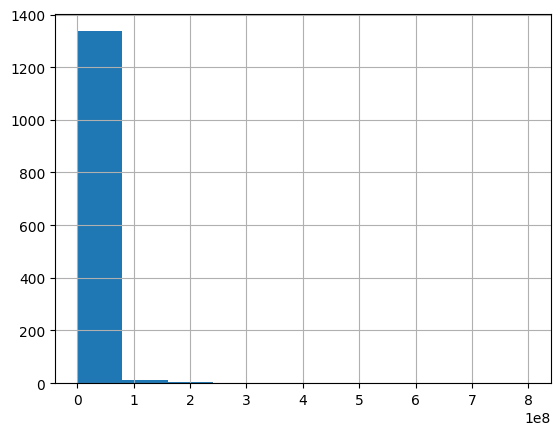

In [38]:
raw_data["price"].hist()

<Axes: >

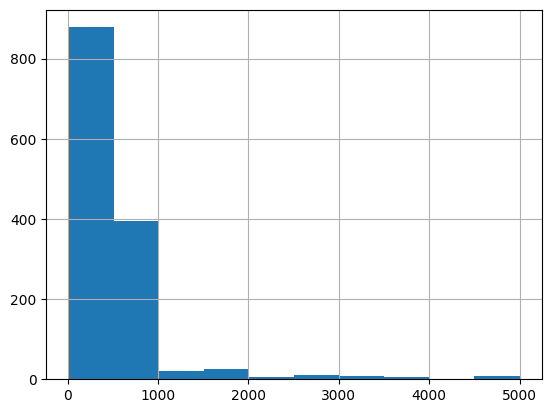

In [40]:
raw_data["Property Size (sqm)"].hist()

In [41]:
# Define a function to remove outliers from a column
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]

# Apply the remove_outliers function to each numerical column in the DataFrame
numerical_columns = raw_data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    raw_data[col] = remove_outliers(raw_data[col])

In [42]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1358 entries, 0 to 1373
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                1207 non-null   float64
 1   axis                 1358 non-null   object 
 2   axis_region          609 non-null    object 
 3   Estate Name          1358 non-null   object 
 4   Property Size (sqm)  1272 non-null   float64
 5   Condition            1358 non-null   object 
 6   Furnishing           1358 non-null   object 
 7   House_Type           1358 non-null   object 
 8   Bedroom              1358 non-null   int32  
 9   Bathrooms            1358 non-null   int32  
 10  is_in_estate         1358 non-null   int32  
 11  has_BQ               1358 non-null   int32  
dtypes: float64(2), int32(4), object(6)
memory usage: 116.7+ KB


In [44]:
raw_data = raw_data.drop("axis_region",axis=1)

In [45]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1358 entries, 0 to 1373
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                1207 non-null   float64
 1   axis                 1358 non-null   object 
 2   Estate Name          1358 non-null   object 
 3   Property Size (sqm)  1272 non-null   float64
 4   Condition            1358 non-null   object 
 5   Furnishing           1358 non-null   object 
 6   House_Type           1358 non-null   object 
 7   Bedroom              1358 non-null   int32  
 8   Bathrooms            1358 non-null   int32  
 9   is_in_estate         1358 non-null   int32  
 10  has_BQ               1358 non-null   int32  
dtypes: float64(2), int32(4), object(5)
memory usage: 106.1+ KB


In [46]:
df = raw_data.dropna()

In [47]:
df

,price,axis,Estate Name,Property Size (sqm),Condition,Furnishing,House_Type,Bedroom,Bathrooms,is_in_estate,has_BQ
0,900000,Ajah,Good Home Estate,500,Fairly Used,Semi-Furnished,Bungalow,2,2,1,0
1,3000000,Lekki,IKOTA VILLA,300,Renovated,Semi-Furnished,Townhouse / Terrace,3,3,1,1
2,1600000,Gbagada,None,110,Newly-Built,Semi-Furnished,Mini Flat,1,1,0,0
3,3700000,Lekki,Orchid road,300,Newly-Built,Unfurnished,Townhouse / Terrace,4,4,1,0
4,1300000,Ojodu,Isheri North GRA,400,Newly-Built,Semi-Furnished,Block of Flats,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1369,12000000,Lekki,None,600,Newly-Built,Furnished,Duplex,4,5,0,0
1370,5000000,Lekki,Chevron,300,Newly-Built,Semi-Furnished,Duplex,4,5,1,1
1371,40000,Yaba,None,105,Newly-Built,Furnished,Shared Apartment,1,1,0,0
1372,10000000,Lekki,Pinnock Beach,900,Renovated,Furnished,Duplex,4,3,1,0


In [49]:
df.reset_index(inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1128 non-null   int64  
 1   price                1128 non-null   float64
 2   axis                 1128 non-null   object 
 3   Estate Name          1128 non-null   object 
 4   Property Size (sqm)  1128 non-null   float64
 5   Condition            1128 non-null   object 
 6   Furnishing           1128 non-null   object 
 7   House_Type           1128 non-null   object 
 8   Bedroom              1128 non-null   int32  
 9   Bathrooms            1128 non-null   int32  
 10  is_in_estate         1128 non-null   int32  
 11  has_BQ               1128 non-null   int32  
dtypes: float64(2), int32(4), int64(1), object(5)
memory usage: 88.3+ KB


<Axes: >

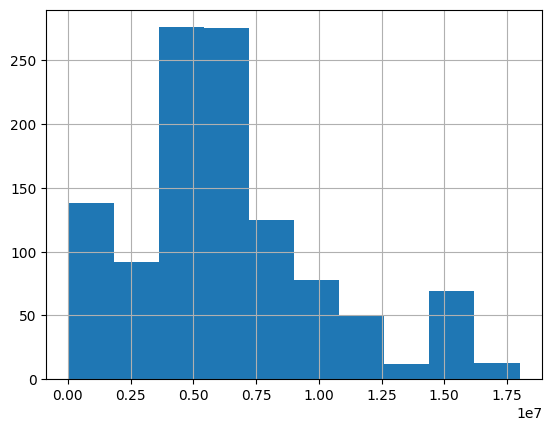

In [51]:
df["price"].hist()

<Axes: >

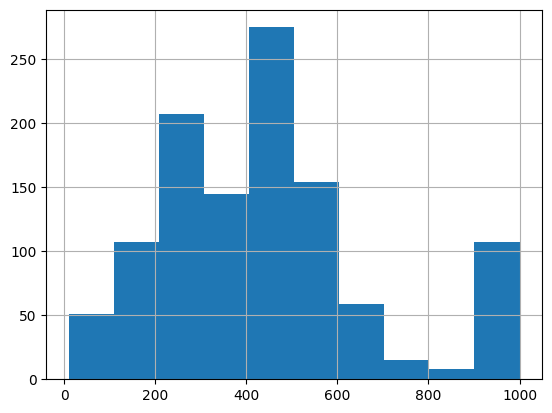

In [52]:
df["Property Size (sqm)"].hist()

## Question 1 What is the distribution of property prices?

In [56]:
df["price"].describe()

count       1128
mean     6404597
std      3859146
min        30000
25%      4000000
50%      5500000
75%      8000000
max     18000000
Name: price, dtype: float64

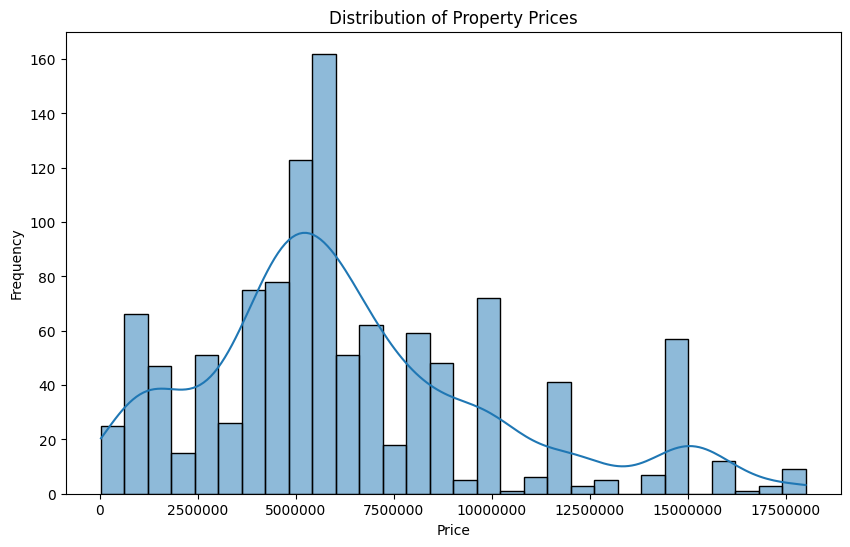

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x')  # Format tick labels on the x-axis as plain numbers
plt.show()

The majority of property prices fall between 30,000 and 18,000,000, with a peak around the 4,000,000 to 8,000,000 range.

The distribution appears to be slightly right-skewed, indicating that there are relatively more properties with lower prices compared to higher prices.

The mean price of 6,404,597 serves as a central measure of the distribution, while the standard deviation of 3,859,146 indicates the dispersion or spread of prices around the mean.

The quartiles (25th, 50th, and 75th percentiles) provide insights into the distribution's spread and central tendency, with 50% of the data falling within the interquartile range (4,000,000 to 8,000,000).

Overall, the chart suggests that property prices in the dataset vary widely, with a notable concentration around the median price, while also featuring some higher-priced outliers.

## Question 2: Which axis has the highest number of properties listed?

In [61]:
axis_with_most_properties = df['axis'].value_counts()
axis_with_most_properties.head(10)

axis
Lekki              823
Ikoyi               68
Ajah                50
Victoria Island     48
Ibeju               19
Surulere            15
Ojodu               15
Ikeja               11
Gbagada             11
Isolo               11
Name: count, dtype: int64

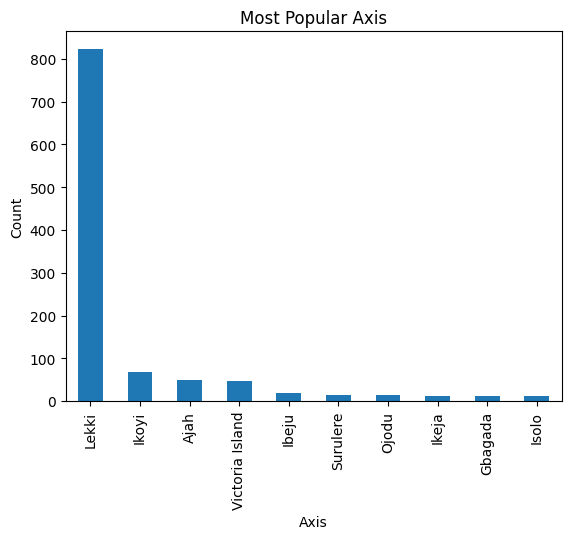

In [64]:
axis_with_most_properties.head(10).plot(kind="bar")
plt.xlabel('Axis')
plt.ylabel('Count')
plt.title('Most Popular Axis')
plt.show()


This bar chart displays the number of properties listed in each axis.

The axis with the highest number of properties listed is identified, which in this case is Lekki.

## Question 3: What is the relationship between property size and price?

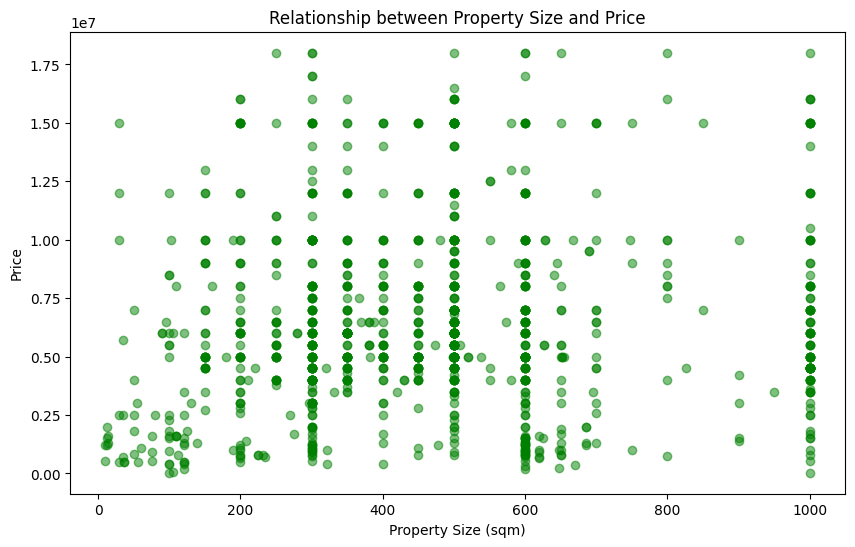

In [67]:
# Relationship between property size and price
plt.figure(figsize=(10, 6))
plt.scatter(df['Property Size (sqm)'], df['price'], color='green', alpha=0.5)
plt.xlabel('Property Size (sqm)')
plt.ylabel('Price')
plt.title('Relationship between Property Size and Price')
plt.show()

This scatter plot visualizes the relationship between property size (in square meters) and price.

It shows the distribution of property prices based on their sizes.

There doesn't seem to be a strong relationship between property size and price, as the data points are scattered without a clear trend.

## Question 4: What are the most common house types listed?

In [69]:
house_type_counts = df['House_Type'].value_counts()
house_type_counts

House_Type
Duplex                 630
Apartment              193
Townhouse / Terrace    154
Block of Flats          66
Mini Flat               20
Maisonette              16
House                   14
Bungalow                10
Studio Apartment         9
Shared Apartment         7
Bedsitter                4
Penthouse                3
Room & Parlour           1
Chalet                   1
Name: count, dtype: int64

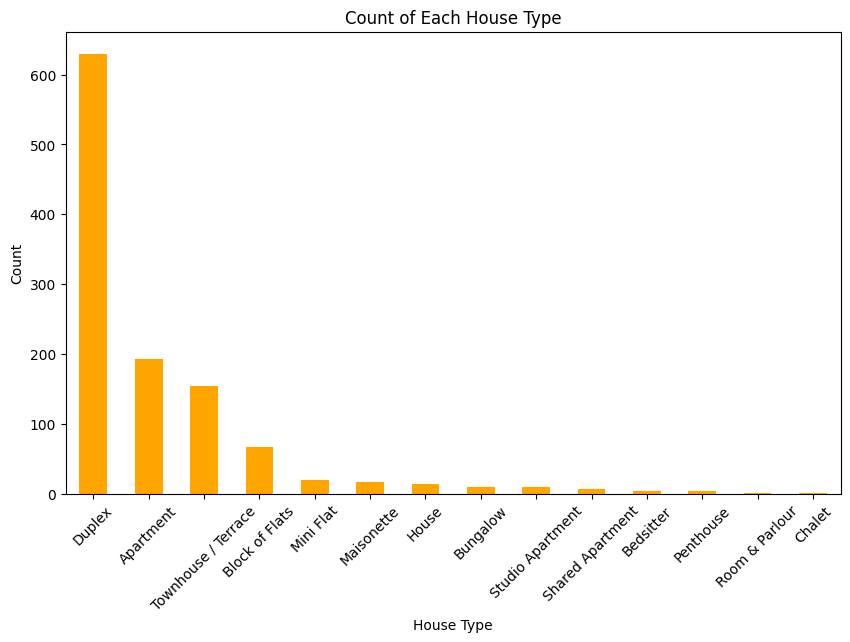

In [70]:
plt.figure(figsize=(10, 6))
house_type_counts.plot(kind='bar', color='orange')
plt.xlabel('House Type')
plt.ylabel('Count')
plt.title('Count of Each House Type')
plt.xticks(rotation=45)
plt.show()

This bar chart illustrates the count of each type of house listed in the dataset.

The most common house type is identified, which is the Duplex.

## Question 5: What is the Distribution of Furnishing

In [71]:
furnishing_counts = df['Furnishing'].value_counts()
furnishing_counts

Furnishing
Semi-Furnished    522
Unfurnished       467
Furnished         139
Name: count, dtype: int64

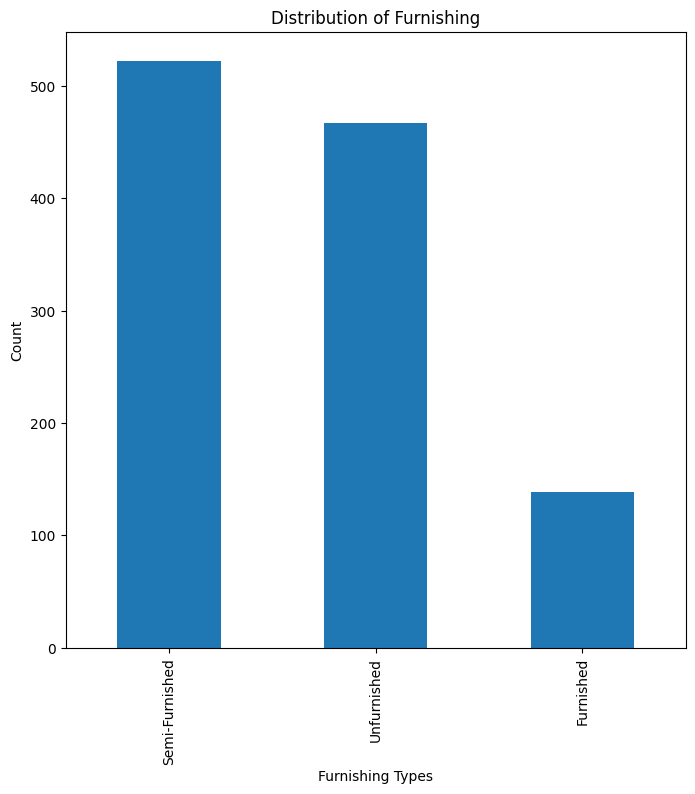

In [73]:
plt.figure(figsize=(8, 8))
furnishing_counts.plot(kind='bar')
plt.title('Distribution of Furnishing')
plt.ylabel('Count')
plt.xlabel('Furnishing Types')
plt.show()

This bar chart displays the distribution of different furnishing types among the listed properties.

It shows the count of properties categorized by their furnishing status, such as Furnished, Semi Furnished, and Unfurnished.

## Question 6: What Distribution of Bedroomms?

In [74]:
bedrooms_count = df["Bedroom"].value_counts()
bedrooms_count

Bedroom
4     631
3     209
5     126
2      85
1      69
6       7
10      1
Name: count, dtype: int64

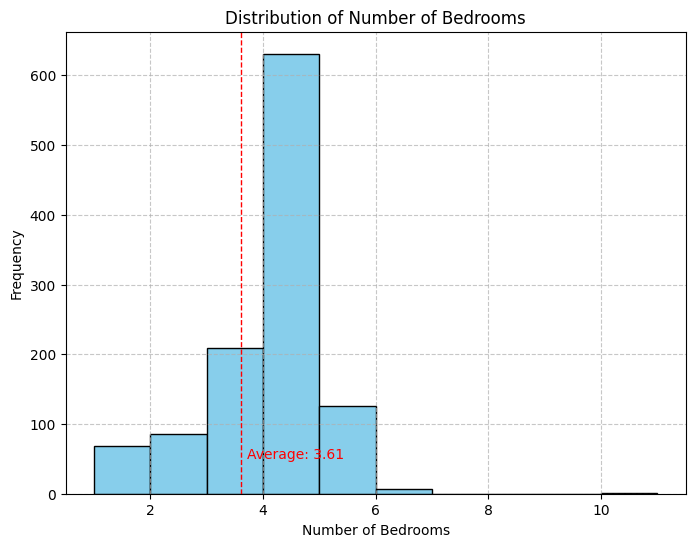

In [76]:
average_bedrooms = df['Bedroom'].mean()
plt.figure(figsize=(8, 6))
plt.hist(df['Bedroom'], bins=range(1, df['Bedroom'].max() + 2), color='skyblue', edgecolor='black')
plt.axvline(average_bedrooms, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.text(average_bedrooms + 0.1, 50, f'Average: {average_bedrooms:.2f}', color='red')
plt.show()

This histogram depicts the distribution of the number of bedrooms among the listed properties.

The average number of bedrooms is marked on the plot to provide a central measure.

## Question 7: How many properties have more than 3 bathrooms?

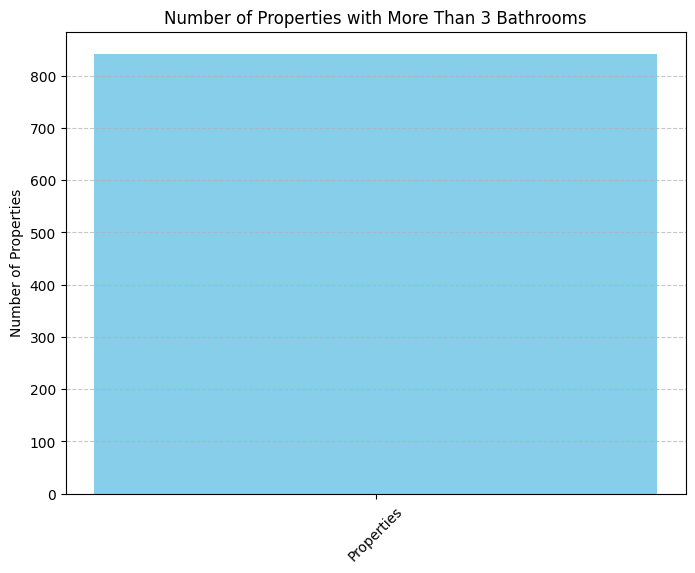

In [77]:
# How many properties have more than 3 bathrooms?
properties_with_more_than_3_bathrooms = df[df['Bathrooms'] > 3].shape[0]
# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['Properties'], [properties_with_more_than_3_bathrooms], color='skyblue')
plt.title('Number of Properties with More Than 3 Bathrooms')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This bar chart shows the count of properties that have more than 3 bathrooms.

## Question 8: What Percentage of Properties are Located Within an Estate?

In [78]:
percentage_within_estate = (df['is_in_estate'].sum() / df.shape[0]) * 100
percentage_within_estate

66.40070921985816

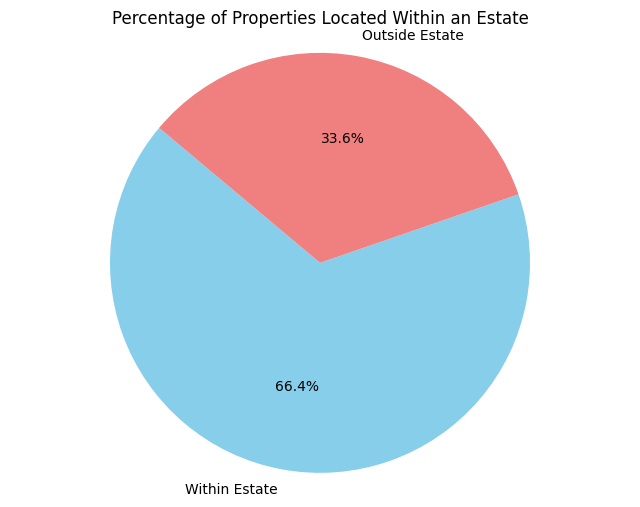

In [79]:
# Plotting
plt.figure(figsize=(8, 6))
plt.pie([percentage_within_estate, 100 - percentage_within_estate], labels=['Within Estate', 'Outside Estate'], 
        colors=['skyblue', 'lightcoral'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Properties Located Within an Estate')
plt.axis('equal')
plt.show()


This pie chart visualizes the percentage of properties that are located within an estate versus those outside an estate

## Question 9: Number of Properties with a Boys' Quarters (BQ)

In [80]:
properties_with_bq = df['has_BQ'].sum()
properties_with_bq

417

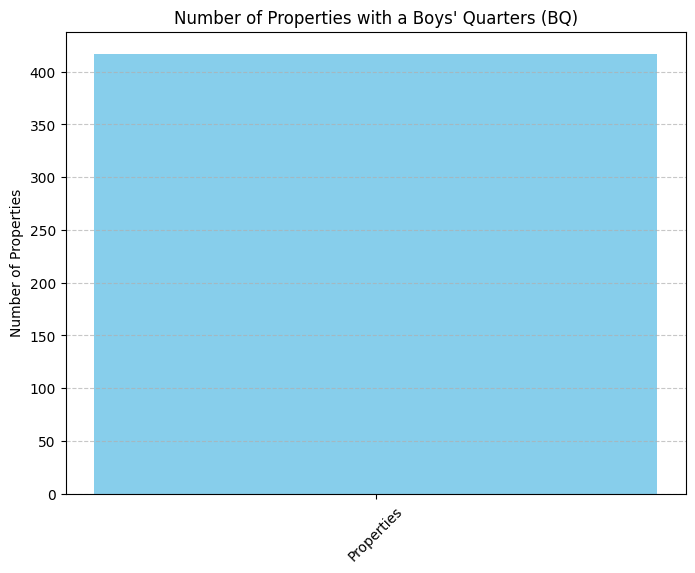

In [81]:
# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['Properties'], [properties_with_bq], color='skyblue')
plt.title('Number of Properties with a Boys\' Quarters (BQ)')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


This bar chart displays the count of properties that have a boys' quarters (BQ).

## Conclusion

These visualizations and analyses provide insights into various aspects of the dataset, such as property prices, types, amenities, and locations. They help in understanding the distribution and characteristics of the listed properties.